In [1]:
##!pip install pycaret

## MODEL CREATION FOR EMOTION - ANGRY

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("labels_oneHot_encoding.csv")

In [3]:
df.head()

,Unnamed: 0,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,...,female_neutral,female_sad,female_surprise,male_angry,male_disgust,male_fear,male_happy,male_neutral,male_sad,male_surprise
0,0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,...,0,0,0,0,0,0,0,1,0,0
1,1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,...,0,0,0,0,0,0,0,1,0,0
2,2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,...,0,0,0,0,0,0,0,1,0,0
3,3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,...,0,0,0,0,0,0,0,1,0,0
4,4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df = df.drop(columns = ["Unnamed: 0" , "gender" , "disgust" , "fear" , "happy" , "neutral" , "sad" , "surprise" , "female_angry" ,"female_disgust" , "female_fear" , "female_happy" , "female_neutral" , "female_sad" , "female_surprise",  "male_angry" ,"male_disgust" , "male_fear" , "male_happy" , "male_neutral" , "male_sad" , "male_surprise" , "path"] , axis = 1)

In [5]:
df.head()

,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_12,pca_mel_13,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,angry
0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,-1.082873,...,-12.453682,-6.254424,-5.244198,-3.020359,-9.067628,-10.647145,-3.032349,3.813296,7.941038,0.0
1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,-2.553631,...,-12.452970,-6.266163,-5.224034,-3.035165,-9.063099,-10.686008,-3.056054,3.814217,7.981975,0.0
2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,-2.645149,...,-12.400792,-6.201859,-4.932682,-3.051120,-9.003797,-10.594508,-2.948012,3.825954,7.939555,0.0
3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,-2.380594,...,-12.388350,-6.240878,-5.088265,-3.072477,-9.064833,-10.652129,-3.076305,3.825014,7.970841,0.0
4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,-1.048890,...,-12.481865,-6.251930,-5.254000,-3.022376,-9.094775,-10.720101,-3.061291,3.846036,8.028451,0.0


In [6]:
df['angry'].value_counts()

0.0    1248
1.0     192
Name: angry, dtype: int64

In [7]:
from pycaret.classification import *
clf = setup(data = df, target = 'angry')

,Description,Value
0,Session id,7037
1,Target,angry
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [8]:
## COMAPRING MODELs

## TRAINING 

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9186,0.8771,0.4929,0.8269,0.6107,0.5695,0.5965,2.1390
lightgbm,Light Gradient Boosting Machine,0.9136,0.8914,0.4330,0.8259,0.5630,0.5218,0.5572,2.2990
et,Extra Trees Classifier,0.9126,0.8552,0.3791,0.9190,0.5248,0.4874,0.5504,1.9810
rf,Random Forest Classifier,0.9116,0.8496,0.4104,0.8570,0.5440,0.5031,0.5498,2.0140
gbc,Gradient Boosting Classifier,0.9116,0.8694,0.4407,0.8171,0.5639,0.5206,0.5555,2.3840
lda,Linear Discriminant Analysis,0.9107,0.8461,0.5308,0.7350,0.6123,0.5635,0.5753,1.7480
ridge,Ridge Classifier,0.9087,0.0000,0.4115,0.8106,0.5337,0.4915,0.5309,1.8600
ada,Ada Boost Classifier,0.9027,0.8499,0.4714,0.7066,0.5585,0.5074,0.5238,1.9440
lr,Logistic Regression,0.8958,0.8325,0.4786,0.6636,0.5486,0.4919,0.5042,3.0000
nb,Naive Bayes,0.8918,0.8142,0.4104,0.6826,0.4980,0.4423,0.4681,1.6940


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [9]:
print(best)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)


In [10]:
## NOW WE ARE CREATING THE MODEL 
clf_model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9208,0.8867,0.5714,0.8000,0.6667,0.6231,0.6345
1,0.9109,0.8128,0.5000,0.7778,0.6087,0.5611,0.5785
2,0.9010,0.8941,0.3571,0.8333,0.5000,0.4546,0.5053
3,0.9208,0.8555,0.5000,0.8750,0.6364,0.5956,0.6250
4,0.9010,0.9135,0.3077,0.8000,0.4444,0.4017,0.4575
5,0.9505,0.9598,0.6923,0.9000,0.7826,0.7552,0.7635
6,0.9307,0.9196,0.5385,0.8750,0.6667,0.6304,0.6536
7,0.9100,0.8364,0.3846,0.8333,0.5263,0.4839,0.5284
8,0.9300,0.8656,0.5385,0.8750,0.6667,0.6300,0.6532


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
### HYPER TUNING OF MODELS --> TO GET SOME BETTER ACCURACY 

clf_model_hypertune = tune_model(clf_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9010,0.8424,0.4286,0.7500,0.5455,0.4945,0.5189
1,0.9010,0.8391,0.5714,0.6667,0.6154,0.5590,0.5611
2,0.8812,0.8851,0.3571,0.6250,0.4545,0.3934,0.4128
3,0.9406,0.8662,0.7143,0.8333,0.7692,0.7354,0.7382
4,0.8911,0.9292,0.2308,0.7500,0.3529,0.3112,0.3767
5,0.9505,0.9685,0.6923,0.9000,0.7826,0.7552,0.7635
6,0.9109,0.9274,0.5385,0.7000,0.6087,0.5594,0.5655
7,0.9200,0.8674,0.5385,0.7778,0.6364,0.5931,0.6058
8,0.9600,0.9054,0.7692,0.9091,0.8333,0.8108,0.8144


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


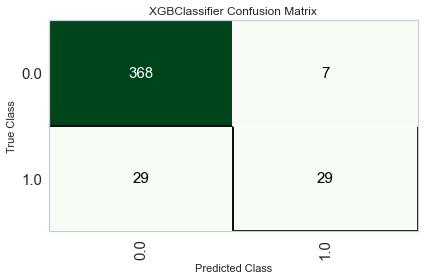

In [12]:
plot_model(clf_model, plot='confusion_matrix')

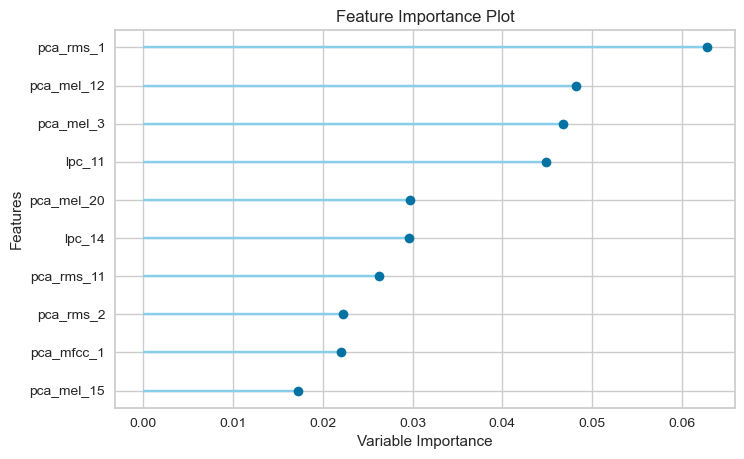

In [13]:
plot_model(clf_model, plot = 'feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

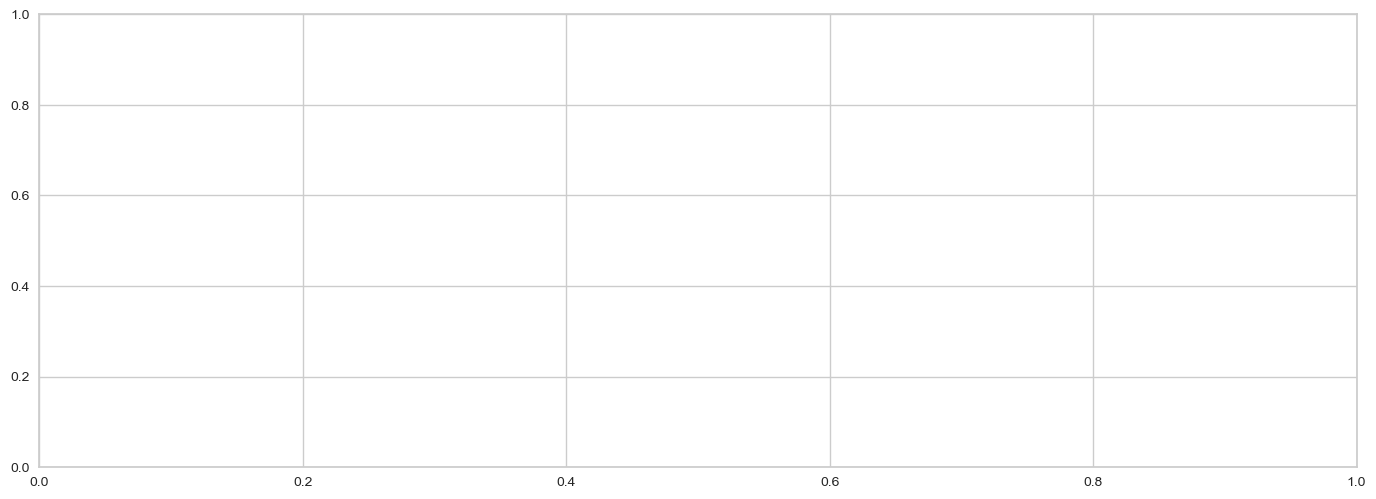

In [14]:
evaluate_model(clf_model)

In [15]:
## NOW WE ARE CREATING A TRAIN AND TEST SPLIT 

setup(data = df, target = 'angry', train_size = 0.7)

,Description,Value
0,Session id,1012
1,Target,angry
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [16]:
## TESTING THE MODEL 

clf_predict = predict_model(clf_model_hypertune)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9723,0.9829,0.8621,0.9259,0.8929,0.8770,0.8777


In [17]:
## SAVING THE MODEL 
save_model(clf_model_hypertune, model_name = "best-model-angry")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pca_mfcc_1', 'pca_mfcc_2',
                                              'pca_mfcc_3', 'pca_mfcc_4',
                                              'pca_mfcc_5', 'pca_mfcc_6',
                                              'pca_mfcc_7', 'pca_mfcc_8',
                                              'pca_mfcc_9', 'pca_mfcc_10',
                                              'pca_mfcc_11', 'pca_mfcc_12',
                                              'pca_mfcc_13', 'pca_mfcc_14',
                                              'pca_mfcc_15', '...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                

In [18]:
loaded_bestmodel_angry = load_model('best-model-angry')
print(loaded_bestmodel_angry)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pca_mfcc_1', 'pca_mfcc_2',
                                             'pca_mfcc_3', 'pca_mfcc_4',
                                             'pca_mfcc_5', 'pca_mfcc_6',
                                             'pca_mfcc_7', 'pca_mfcc_8',
                                             'pca_mfcc_9', 'pca_mfcc_10',
                                             'pca_mfcc_11', 'pca_mfcc_12',
                                             'pca_mfcc_13', 'pca_mfcc_14',
                                             'pca_mfcc_15', '...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, 

In [19]:
from sklearn import set_config
set_config(display = "diagram")
loaded_bestmodel_angry[0]

TransformerWrapper(exclude=None,
                   include=['pca_mfcc_1', 'pca_mfcc_2', 'pca_mfcc_3',
                            'pca_mfcc_4', 'pca_mfcc_5', 'pca_mfcc_6',
                            'pca_mfcc_7', 'pca_mfcc_8', 'pca_mfcc_9',
                            'pca_mfcc_10', 'pca_mfcc_11', 'pca_mfcc_12',
                            'pca_mfcc_13', 'pca_mfcc_14', 'pca_mfcc_15',
                            'pca_mfcc_16', 'pca_mfcc_17', 'pca_mfcc_18',
                            'pca_mfcc_19', 'pca_mfcc_20', 'pca_zcr_1',
                            'pca_zcr_2', 'pca_zcr_3', 'pca_zcr_4', 'pca_zcr_5',
                            'pca_zcr_6', 'pca_zcr_7', 'pca_zcr_8', 'pca_zcr_9',
                            'pca_zcr_10', ...],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             fill_value=None,
                                             missing_values=nan,
                                             strategy='mean', verbose=0))

## MODEL CREATION FOR - DISGUST 

In [36]:
df_disgust = pd.read_csv("labels_oneHot_encoding.csv")

In [37]:
df_disgust.head()

,Unnamed: 0,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,...,female_neutral,female_sad,female_surprise,male_angry,male_disgust,male_fear,male_happy,male_neutral,male_sad,male_surprise
0,0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,...,0,0,0,0,0,0,0,1,0,0
1,1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,...,0,0,0,0,0,0,0,1,0,0
2,2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,...,0,0,0,0,0,0,0,1,0,0
3,3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,...,0,0,0,0,0,0,0,1,0,0
4,4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,...,0,0,0,0,0,0,0,1,0,0


In [38]:
df_disgust = df_disgust.drop(columns = ["Unnamed: 0" , "angry" , "gender" , "fear" , "happy" , "neutral" , "sad" , "surprise" , "female_angry" ,"female_disgust" , "female_fear" , "female_happy" , "female_neutral" , "female_sad" , "female_surprise",  "male_angry" ,"male_disgust" , "male_fear" , "male_happy" , "male_neutral" , "male_sad" , "male_surprise" , "path"] , axis = 1)

In [39]:
df_disgust.head()

,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_12,pca_mel_13,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,disgust
0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,-1.082873,...,-12.453682,-6.254424,-5.244198,-3.020359,-9.067628,-10.647145,-3.032349,3.813296,7.941038,0.0
1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,-2.553631,...,-12.452970,-6.266163,-5.224034,-3.035165,-9.063099,-10.686008,-3.056054,3.814217,7.981975,0.0
2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,-2.645149,...,-12.400792,-6.201859,-4.932682,-3.051120,-9.003797,-10.594508,-2.948012,3.825954,7.939555,0.0
3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,-2.380594,...,-12.388350,-6.240878,-5.088265,-3.072477,-9.064833,-10.652129,-3.076305,3.825014,7.970841,0.0
4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,-1.048890,...,-12.481865,-6.251930,-5.254000,-3.022376,-9.094775,-10.720101,-3.061291,3.846036,8.028451,0.0


In [40]:
df_disgust['disgust'].value_counts()

0.0    1248
1.0     192
Name: disgust, dtype: int64

In [41]:
from pycaret.classification import *
clf_disgust = setup(data = df_disgust, target = 'disgust')

,Description,Value
0,Session id,3299
1,Target,disgust
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [42]:
## COMAPRING MODELs

## TRAINING 

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8998,0.0000,0.3467,0.8031,0.4632,0.4210,0.4710,2.0470
xgboost,Extreme Gradient Boosting,0.8957,0.8895,0.3159,0.7456,0.4368,0.3925,0.4382,2.4350
ada,Ada Boost Classifier,0.8928,0.8519,0.4088,0.6494,0.4924,0.4376,0.4566,2.2590
lightgbm,Light Gradient Boosting Machine,0.8927,0.9042,0.2852,0.7696,0.4068,0.3631,0.4210,2.7020
lr,Logistic Regression,0.8898,0.8645,0.4692,0.6137,0.5258,0.4656,0.4741,3.7440
gbc,Gradient Boosting Classifier,0.8898,0.8657,0.2418,0.7624,0.3564,0.3174,0.3825,2.7990
lda,Linear Discriminant Analysis,0.8898,0.8609,0.5984,0.5815,0.5865,0.5234,0.5254,2.0290
et,Extra Trees Classifier,0.8719,0.8445,0.0379,0.3000,0.0651,0.0587,0.0964,2.3040
rf,Random Forest Classifier,0.8699,0.8312,0.0231,0.2000,0.0410,0.0367,0.0630,2.3680
qda,Quadratic Discriminant Analysis,0.8679,0.5629,0.0077,0.1000,0.0143,0.0127,0.0260,2.0360


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [43]:
print(best)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize='deprecated', positive=False,
                random_state=3299, solver='auto', tol=0.001)


In [44]:
## NOW WE ARE CREATING THE MODEL 
clf_model_disgust = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9010,0.9379,0.3077,0.8000,0.4444,0.4017,0.4575
1,0.9109,0.8881,0.3846,0.8333,0.5263,0.4844,0.5288
2,0.9307,0.9196,0.5385,0.8750,0.6667,0.6304,0.6536
3,0.8614,0.8760,0.0714,0.5000,0.1250,0.0936,0.1487
4,0.9109,0.9433,0.3571,1.0000,0.5263,0.4890,0.5689
5,0.8515,0.8366,0.1429,0.4000,0.2105,0.1484,0.1726
6,0.9109,0.9228,0.3571,1.0000,0.5263,0.4890,0.5689
7,0.9000,0.9328,0.3846,0.7143,0.5000,0.4499,0.4767
8,0.8700,0.7524,0.2308,0.5000,0.3158,0.2546,0.2780


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [45]:
### HYPER TUNING OF MODELS --> TO GET SOME BETTER ACCURACY 

clf_model_hypertune_disgust = tune_model(clf_model_disgust)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9109,0.8942,0.6154,0.6667,0.6400,0.5892,0.5899
1,0.8911,0.8488,0.3846,0.6250,0.4762,0.4192,0.4347
2,0.9010,0.8322,0.5385,0.6364,0.5833,0.5276,0.5300
3,0.8911,0.8539,0.5000,0.6364,0.5600,0.4989,0.5036
4,0.8911,0.9072,0.4286,0.6667,0.5217,0.4635,0.4780
5,0.8713,0.7952,0.4286,0.5455,0.4800,0.4078,0.4116
6,0.9010,0.9085,0.4286,0.7500,0.5455,0.4945,0.5189
7,0.9100,0.9310,0.6154,0.6667,0.6400,0.5887,0.5893
8,0.8900,0.7604,0.3077,0.6667,0.4211,0.3693,0.4032


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


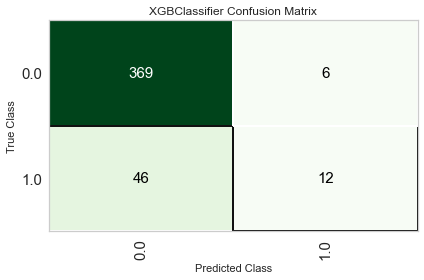

In [46]:
plot_model(clf_model_disgust, plot='confusion_matrix')

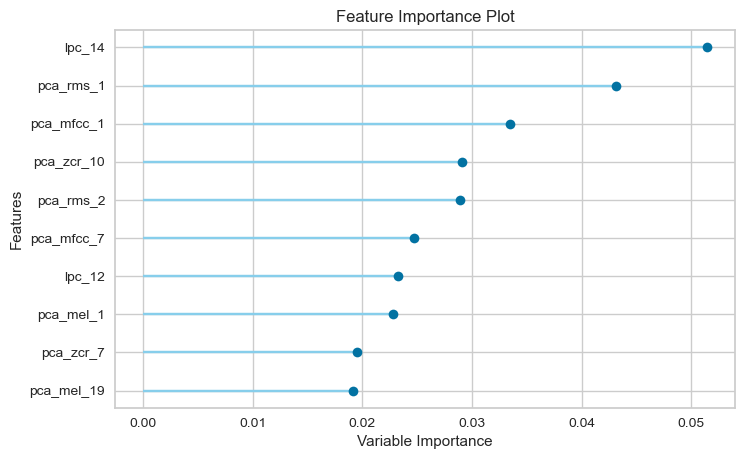

In [47]:
plot_model(clf_model_disgust, plot = 'feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

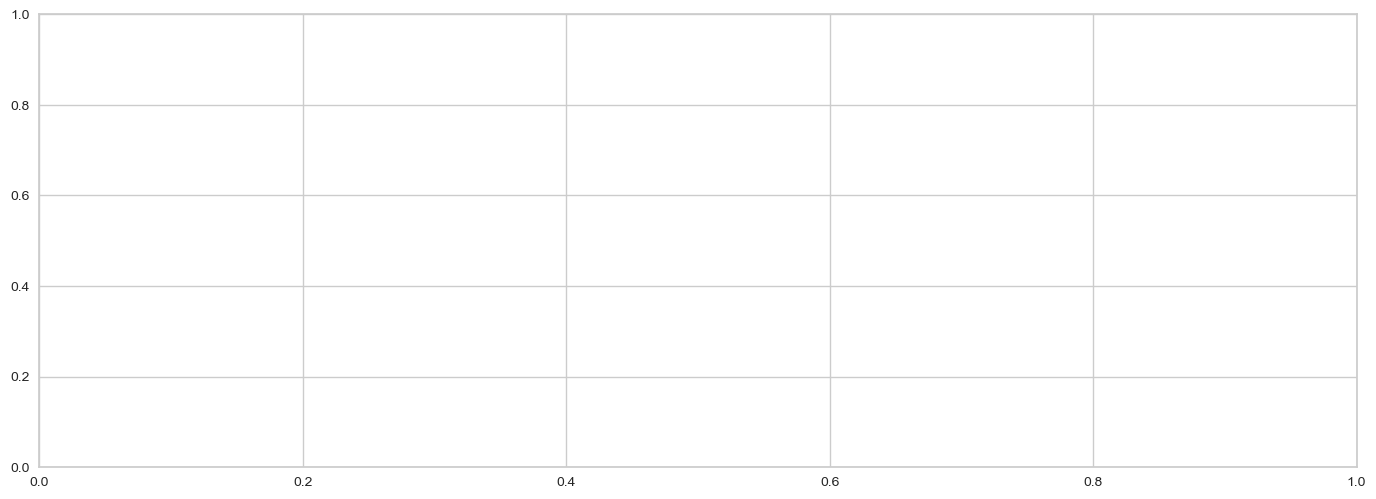

In [54]:
evaluate_model(clf_model_disgust)

In [49]:
## NOW WE ARE CREATING A TRAIN AND TEST SPLIT 

setup(data = df_disgust, target = 'disgust', train_size = 0.7)

,Description,Value
0,Session id,5111
1,Target,disgust
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [50]:
## TESTING THE MODEL 

clf_predict = predict_model(clf_model_hypertune_disgust)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9561,0.9616,0.7414,0.9149,0.8190,0.7944,0.8001


In [51]:
## SAVING THE MODEL 
save_model(clf_model_hypertune_disgust, model_name = "best-model-disgust")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pca_mfcc_1', 'pca_mfcc_2',
                                              'pca_mfcc_3', 'pca_mfcc_4',
                                              'pca_mfcc_5', 'pca_mfcc_6',
                                              'pca_mfcc_7', 'pca_mfcc_8',
                                              'pca_mfcc_9', 'pca_mfcc_10',
                                              'pca_mfcc_11', 'pca_mfcc_12',
                                              'pca_mfcc_13', 'pca_mfcc_14',
                                              'pca_mfcc_15', '...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                

In [52]:
loaded_bestmodel_disgust = load_model('best-model-disgust')
print(loaded_bestmodel_disgust)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pca_mfcc_1', 'pca_mfcc_2',
                                             'pca_mfcc_3', 'pca_mfcc_4',
                                             'pca_mfcc_5', 'pca_mfcc_6',
                                             'pca_mfcc_7', 'pca_mfcc_8',
                                             'pca_mfcc_9', 'pca_mfcc_10',
                                             'pca_mfcc_11', 'pca_mfcc_12',
                                             'pca_mfcc_13', 'pca_mfcc_14',
                                             'pca_mfcc_15', '...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, 

In [53]:
from sklearn import set_config
set_config(display = "diagram")
loaded_bestmodel_disgust[0]

TransformerWrapper(exclude=None,
                   include=['pca_mfcc_1', 'pca_mfcc_2', 'pca_mfcc_3',
                            'pca_mfcc_4', 'pca_mfcc_5', 'pca_mfcc_6',
                            'pca_mfcc_7', 'pca_mfcc_8', 'pca_mfcc_9',
                            'pca_mfcc_10', 'pca_mfcc_11', 'pca_mfcc_12',
                            'pca_mfcc_13', 'pca_mfcc_14', 'pca_mfcc_15',
                            'pca_mfcc_16', 'pca_mfcc_17', 'pca_mfcc_18',
                            'pca_mfcc_19', 'pca_mfcc_20', 'pca_zcr_1',
                            'pca_zcr_2', 'pca_zcr_3', 'pca_zcr_4', 'pca_zcr_5',
                            'pca_zcr_6', 'pca_zcr_7', 'pca_zcr_8', 'pca_zcr_9',
                            'pca_zcr_10', ...],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             fill_value=None,
                                             missing_values=nan,
                                             strategy='mean', verbose=0))

## MODEL CREATION FOR - FEAR

In [55]:
df_fear = pd.read_csv("labels_oneHot_encoding.csv")

In [56]:
df_fear.head()

,Unnamed: 0,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,...,female_neutral,female_sad,female_surprise,male_angry,male_disgust,male_fear,male_happy,male_neutral,male_sad,male_surprise
0,0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,...,0,0,0,0,0,0,0,1,0,0
1,1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,...,0,0,0,0,0,0,0,1,0,0
2,2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,...,0,0,0,0,0,0,0,1,0,0
3,3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,...,0,0,0,0,0,0,0,1,0,0
4,4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,...,0,0,0,0,0,0,0,1,0,0


In [57]:
df_fear = df_fear.drop(columns = ["Unnamed: 0" , "angry" , "disgust" , "gender" , "happy" , "neutral" , "sad" , "surprise" , "female_angry" ,"female_disgust" , "female_fear" , "female_happy" , "female_neutral" , "female_sad" , "female_surprise",  "male_angry" ,"male_disgust" , "male_fear" , "male_happy" , "male_neutral" , "male_sad" , "male_surprise" , "path"] , axis = 1)

In [58]:
df_fear.head()

,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_12,pca_mel_13,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,fear
0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,-1.082873,...,-12.453682,-6.254424,-5.244198,-3.020359,-9.067628,-10.647145,-3.032349,3.813296,7.941038,0.0
1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,-2.553631,...,-12.452970,-6.266163,-5.224034,-3.035165,-9.063099,-10.686008,-3.056054,3.814217,7.981975,0.0
2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,-2.645149,...,-12.400792,-6.201859,-4.932682,-3.051120,-9.003797,-10.594508,-2.948012,3.825954,7.939555,0.0
3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,-2.380594,...,-12.388350,-6.240878,-5.088265,-3.072477,-9.064833,-10.652129,-3.076305,3.825014,7.970841,0.0
4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,-1.048890,...,-12.481865,-6.251930,-5.254000,-3.022376,-9.094775,-10.720101,-3.061291,3.846036,8.028451,0.0


In [59]:
df_fear['fear'].value_counts()

0.0    1248
1.0     192
Name: fear, dtype: int64

In [60]:
from pycaret.classification import *
clf_fear = setup(data = df_fear, target = 'fear')

,Description,Value
0,Session id,2483
1,Target,fear
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [61]:
## COMAPRING MODELs

## TRAINING 

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8858,0.8746,0.2385,0.7232,0.3476,0.3040,0.3643,2.7390
lightgbm,Light Gradient Boosting Machine,0.8828,0.8636,0.1797,0.7000,0.2772,0.2427,0.3117,3.5160
ada,Ada Boost Classifier,0.8808,0.7876,0.3654,0.5832,0.4434,0.3818,0.3974,2.3660
gbc,Gradient Boosting Classifier,0.8788,0.8555,0.1956,0.6600,0.2944,0.2507,0.3085,2.8300
rf,Random Forest Classifier,0.8729,0.8096,0.0687,0.5167,0.1194,0.1021,0.1649,2.5960
ridge,Ridge Classifier,0.8710,0.0000,0.2159,0.5883,0.3077,0.2525,0.2959,2.1300
et,Extra Trees Classifier,0.8709,0.8313,0.0379,0.3500,0.0676,0.0586,0.1036,2.3720
qda,Quadratic Discriminant Analysis,0.8669,0.5327,0.0000,0.0000,0.0000,0.0000,0.0000,2.3120
dummy,Dummy Classifier,0.8669,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,2.4330
knn,K Neighbors Classifier,0.8630,0.7093,0.1571,0.4405,0.2287,0.1740,0.2021,2.3950


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [62]:
print(best)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)


In [65]:
clf_model_fear = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9010,0.8785,0.2857,1.0000,0.4444,0.4080,0.5062
1,0.8614,0.8489,0.1429,0.5000,0.2222,0.1712,0.2124
2,0.9109,0.8801,0.4286,0.8571,0.5714,0.5278,0.5674
3,0.8713,0.8563,0.1429,0.6667,0.2353,0.1960,0.2674
4,0.8911,0.8995,0.1538,1.0000,0.2667,0.2406,0.3698
5,0.8911,0.8610,0.3077,0.6667,0.4211,0.3698,0.4037
6,0.8911,0.8881,0.3846,0.6250,0.4762,0.4192,0.4347
7,0.8800,0.8718,0.1538,0.6667,0.2500,0.2116,0.2806
8,0.8900,0.8753,0.2308,0.7500,0.3529,0.3108,0.3763


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [66]:
### HYPER TUNING OF MODELS --> TO GET SOME BETTER ACCURACY 

clf_model_hypertune_fear = tune_model(clf_model_fear)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9109,0.9023,0.5000,0.7778,0.6087,0.5611,0.5785
1,0.8515,0.8571,0.2143,0.4286,0.2857,0.2130,0.2290
2,0.8713,0.8325,0.3571,0.5556,0.4348,0.3660,0.3774
3,0.8812,0.8481,0.4286,0.6000,0.5000,0.4347,0.4426
4,0.9109,0.8802,0.5385,0.7000,0.6087,0.5594,0.5655
5,0.9208,0.8951,0.5385,0.7778,0.6364,0.5936,0.6062
6,0.9109,0.8907,0.4615,0.7500,0.5714,0.5248,0.5441
7,0.8800,0.8842,0.3846,0.5556,0.4545,0.3896,0.3979
8,0.8900,0.8939,0.3077,0.6667,0.4211,0.3693,0.4032


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


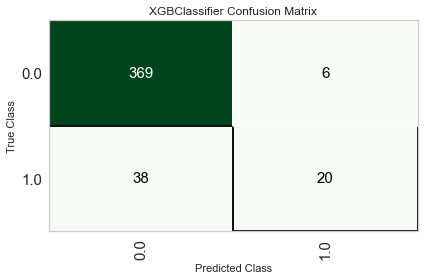

In [67]:
plot_model(clf_model_fear, plot='confusion_matrix')

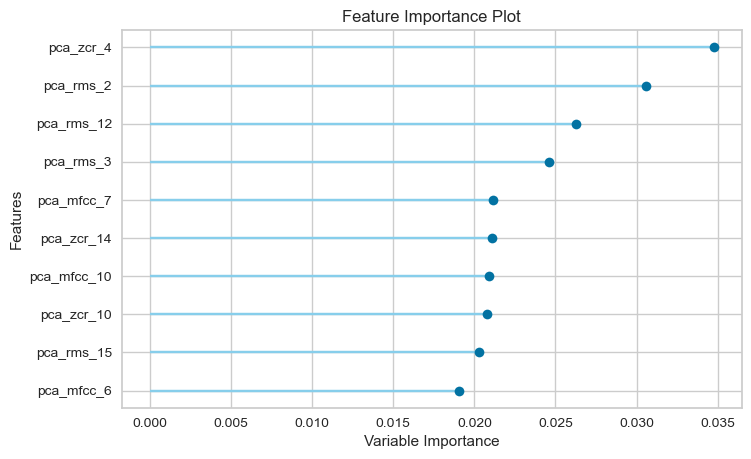

In [68]:
plot_model(clf_model_fear, plot = 'feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

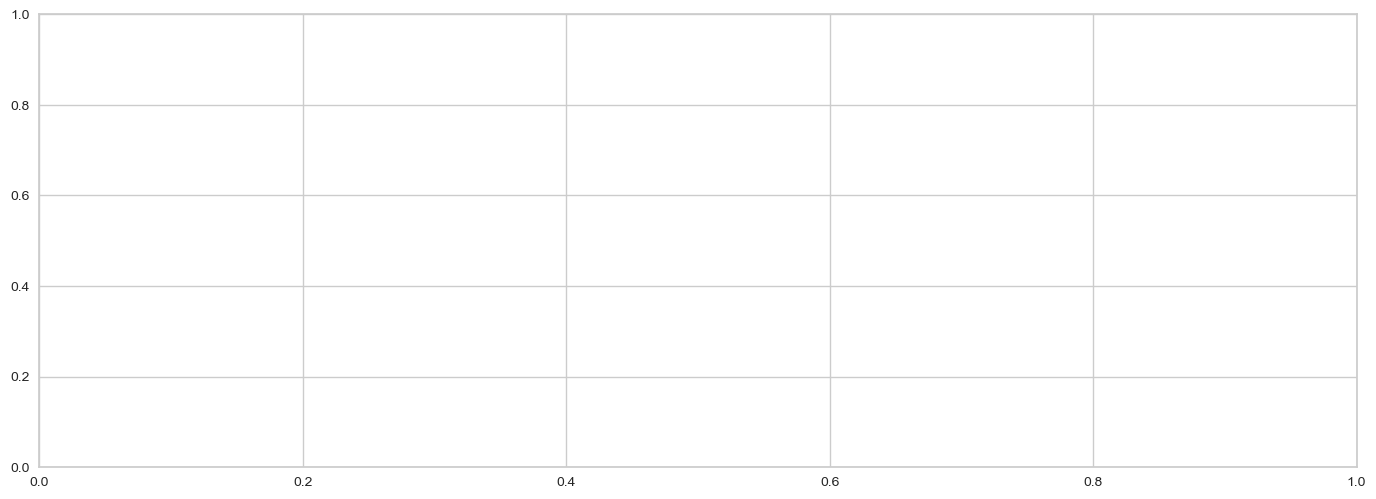

In [69]:
evaluate_model(clf_model_fear)

In [70]:
## NOW WE ARE CREATING A TRAIN AND TEST SPLIT 

setup(data = df_fear, target = 'fear', train_size = 0.7)

,Description,Value
0,Session id,6744
1,Target,fear
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [71]:
## TESTING THE MODEL 

clf_predict = predict_model(clf_model_hypertune_fear)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9469,0.9469,0.7586,0.8302,0.7928,0.7624,0.7634


In [72]:
## SAVING THE MODEL 
save_model(clf_model_hypertune_fear, model_name = "best-model-fear")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pca_mfcc_1', 'pca_mfcc_2',
                                              'pca_mfcc_3', 'pca_mfcc_4',
                                              'pca_mfcc_5', 'pca_mfcc_6',
                                              'pca_mfcc_7', 'pca_mfcc_8',
                                              'pca_mfcc_9', 'pca_mfcc_10',
                                              'pca_mfcc_11', 'pca_mfcc_12',
                                              'pca_mfcc_13', 'pca_mfcc_14',
                                              'pca_mfcc_15', '...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=0.05,
                                max_bin=None, max_cat_threshold=None,
                

In [73]:
loaded_bestmodel_fear = load_model('best-model-fear')
print(loaded_bestmodel_fear)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pca_mfcc_1', 'pca_mfcc_2',
                                             'pca_mfcc_3', 'pca_mfcc_4',
                                             'pca_mfcc_5', 'pca_mfcc_6',
                                             'pca_mfcc_7', 'pca_mfcc_8',
                                             'pca_mfcc_9', 'pca_mfcc_10',
                                             'pca_mfcc_11', 'pca_mfcc_12',
                                             'pca_mfcc_13', 'pca_mfcc_14',
                                             'pca_mfcc_15', '...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, 

In [74]:
from sklearn import set_config
set_config(display = "diagram")
loaded_bestmodel_fear[0]

TransformerWrapper(exclude=None,
                   include=['pca_mfcc_1', 'pca_mfcc_2', 'pca_mfcc_3',
                            'pca_mfcc_4', 'pca_mfcc_5', 'pca_mfcc_6',
                            'pca_mfcc_7', 'pca_mfcc_8', 'pca_mfcc_9',
                            'pca_mfcc_10', 'pca_mfcc_11', 'pca_mfcc_12',
                            'pca_mfcc_13', 'pca_mfcc_14', 'pca_mfcc_15',
                            'pca_mfcc_16', 'pca_mfcc_17', 'pca_mfcc_18',
                            'pca_mfcc_19', 'pca_mfcc_20', 'pca_zcr_1',
                            'pca_zcr_2', 'pca_zcr_3', 'pca_zcr_4', 'pca_zcr_5',
                            'pca_zcr_6', 'pca_zcr_7', 'pca_zcr_8', 'pca_zcr_9',
                            'pca_zcr_10', ...],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             fill_value=None,
                                             missing_values=nan,
                                             strategy='mean', verbose=0))

## MODEL CREATION FOR - HAPPY 

In [75]:
df_happy = pd.read_csv("labels_oneHot_encoding.csv")

In [76]:
df_happy.head()

,Unnamed: 0,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,...,female_neutral,female_sad,female_surprise,male_angry,male_disgust,male_fear,male_happy,male_neutral,male_sad,male_surprise
0,0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,...,0,0,0,0,0,0,0,1,0,0
1,1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,...,0,0,0,0,0,0,0,1,0,0
2,2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,...,0,0,0,0,0,0,0,1,0,0
3,3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,...,0,0,0,0,0,0,0,1,0,0
4,4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,...,0,0,0,0,0,0,0,1,0,0


In [77]:
df_happy = df_happy.drop(columns = ["Unnamed: 0" , "angry" , "disgust" , "fear" , "gender" , "neutral" , "sad" , "surprise" , "female_angry" ,"female_disgust" , "female_fear" , "female_happy" , "female_neutral" , "female_sad" , "female_surprise",  "male_angry" ,"male_disgust" , "male_fear" , "male_happy" , "male_neutral" , "male_sad" , "male_surprise" , "path"] , axis = 1)

In [78]:
df_happy.head()

,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_12,pca_mel_13,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,happy
0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,-1.082873,...,-12.453682,-6.254424,-5.244198,-3.020359,-9.067628,-10.647145,-3.032349,3.813296,7.941038,0.0
1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,-2.553631,...,-12.452970,-6.266163,-5.224034,-3.035165,-9.063099,-10.686008,-3.056054,3.814217,7.981975,0.0
2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,-2.645149,...,-12.400792,-6.201859,-4.932682,-3.051120,-9.003797,-10.594508,-2.948012,3.825954,7.939555,0.0
3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,-2.380594,...,-12.388350,-6.240878,-5.088265,-3.072477,-9.064833,-10.652129,-3.076305,3.825014,7.970841,0.0
4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,-1.048890,...,-12.481865,-6.251930,-5.254000,-3.022376,-9.094775,-10.720101,-3.061291,3.846036,8.028451,0.0


In [79]:
df_happy['happy'].value_counts()

0.0    1248
1.0     192
Name: happy, dtype: int64

In [80]:
from pycaret.classification import *
clf_happy = setup(data = df_happy, target = 'happy')

,Description,Value
0,Session id,4910
1,Target,happy
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [81]:
## COMAPRING MODELs

## TRAINING 

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8728,0.8082,0.1637,0.5550,0.2458,0.2027,0.2494,3.1080
ada,Ada Boost Classifier,0.8719,0.7925,0.3209,0.5637,0.3993,0.3338,0.3552,2.4580
xgboost,Extreme Gradient Boosting,0.8699,0.8096,0.1654,0.5839,0.2413,0.1953,0.2462,2.7610
knn,K Neighbors Classifier,0.8679,0.7149,0.1264,0.4850,0.1947,0.1528,0.1942,3.0380
rf,Random Forest Classifier,0.8679,0.7693,0.0220,0.3000,0.0410,0.0323,0.0681,2.6390
et,Extra Trees Classifier,0.8679,0.7687,0.0148,0.1500,0.0267,0.0220,0.0407,2.5150
qda,Quadratic Discriminant Analysis,0.8669,0.5034,0.0000,0.0000,0.0000,0.0000,0.0000,2.3280
dummy,Dummy Classifier,0.8669,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,2.4030
ridge,Ridge Classifier,0.8630,0.0000,0.0912,0.3583,0.1449,0.1056,0.1318,2.7590
lightgbm,Light Gradient Boosting Machine,0.8620,0.8208,0.0522,0.3750,0.0889,0.0593,0.0966,2.8840


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [82]:
print(best)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=4910, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [83]:
## NOW WE ARE CREATING THE MODEL 
clf_model_happy = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9010,0.8523,0.3077,0.8000,0.4444,0.4017,0.4575
1,0.8911,0.7736,0.2308,0.7500,0.3529,0.3112,0.3767
2,0.8812,0.8741,0.2308,0.6000,0.3333,0.2820,0.3212
3,0.8713,0.7693,0.0714,1.0000,0.1333,0.1170,0.2493
4,0.8515,0.7365,0.1429,0.4000,0.2105,0.1484,0.1726
5,0.8911,0.8128,0.2857,0.8000,0.4211,0.3755,0.4368
6,0.8812,0.8498,0.2143,0.7500,0.3333,0.2896,0.3593
7,0.8400,0.8302,0.0769,0.2000,0.1111,0.0419,0.0478
8,0.8500,0.7542,0.0769,0.2500,0.1176,0.0602,0.0728


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [84]:
### HYPER TUNING OF MODELS --> TO GET SOME BETTER ACCURACY 

clf_model_hypertune_happy = tune_model(clf_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8713,0.8531,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8713,0.8024,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8713,0.8593,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8614,0.7972,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8614,0.7266,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8614,0.7529,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8614,0.7233,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8700,0.8019,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8700,0.7277,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


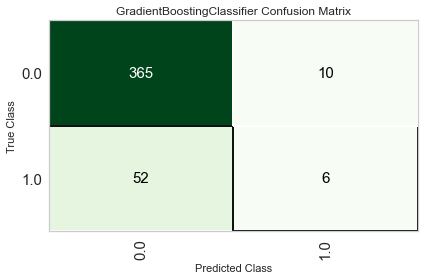

In [85]:
plot_model(clf_model_happy, plot='confusion_matrix')

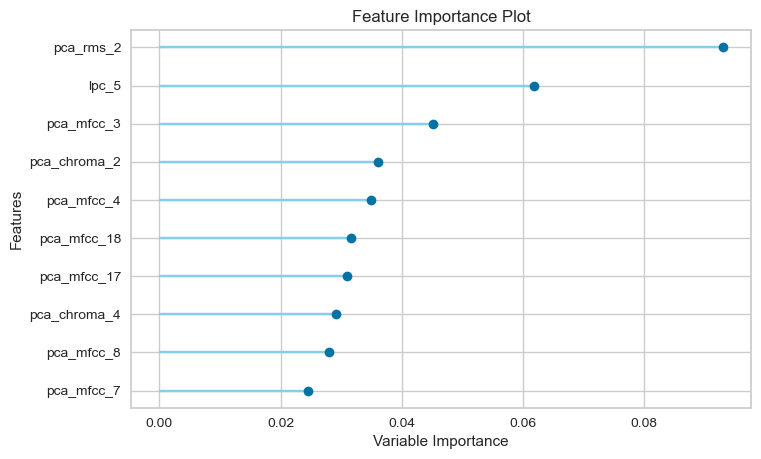

In [86]:
plot_model(clf_model_happy, plot = 'feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

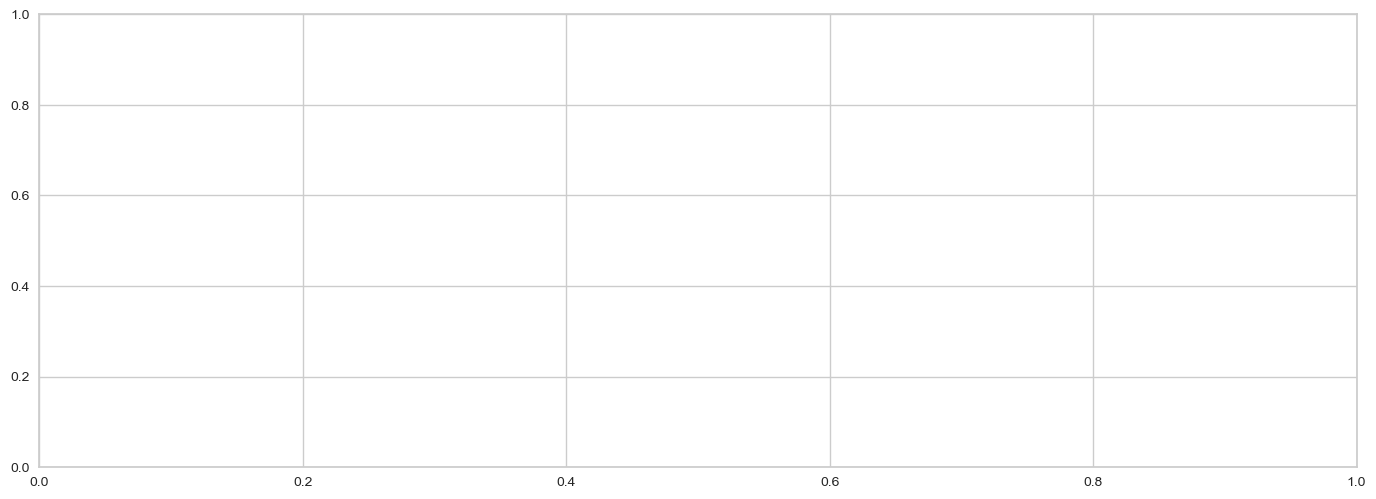

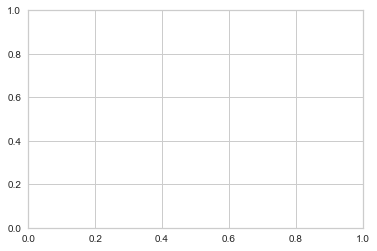

In [87]:
evaluate_model(clf_model_happy)

In [88]:
## NOW WE ARE CREATING A TRAIN AND TEST SPLIT 

setup(data = df_happy, target = 'happy', train_size = 0.7)

,Description,Value
0,Session id,8155
1,Target,happy
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [89]:
## TESTING THE MODEL 

clf_predict = predict_model(clf_model_hypertune_happy)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9469,0.9518,0.6552,0.9268,0.7677,0.7387,0.7529


In [90]:
## SAVING THE MODEL 
save_model(clf_model_hypertune_happy, model_name = "best-model-happy")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pca_mfcc_1', 'pca_mfcc_2',
                                              'pca_mfcc_3', 'pca_mfcc_4',
                                              'pca_mfcc_5', 'pca_mfcc_6',
                                              'pca_mfcc_7', 'pca_mfcc_8',
                                              'pca_mfcc_9', 'pca_mfcc_10',
                                              'pca_mfcc_11', 'pca_mfcc_12',
                                              'pca_mfcc_13', 'pca_mfcc_14',
                                              'pca_mfcc_15', '...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                

In [91]:
loaded_bestmodel_happy = load_model('best-model-happy')
print(loaded_bestmodel_happy)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pca_mfcc_1', 'pca_mfcc_2',
                                             'pca_mfcc_3', 'pca_mfcc_4',
                                             'pca_mfcc_5', 'pca_mfcc_6',
                                             'pca_mfcc_7', 'pca_mfcc_8',
                                             'pca_mfcc_9', 'pca_mfcc_10',
                                             'pca_mfcc_11', 'pca_mfcc_12',
                                             'pca_mfcc_13', 'pca_mfcc_14',
                                             'pca_mfcc_15', '...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, 

In [92]:
from sklearn import set_config
set_config(display = "diagram")
loaded_bestmodel_happy[0]

TransformerWrapper(exclude=None,
                   include=['pca_mfcc_1', 'pca_mfcc_2', 'pca_mfcc_3',
                            'pca_mfcc_4', 'pca_mfcc_5', 'pca_mfcc_6',
                            'pca_mfcc_7', 'pca_mfcc_8', 'pca_mfcc_9',
                            'pca_mfcc_10', 'pca_mfcc_11', 'pca_mfcc_12',
                            'pca_mfcc_13', 'pca_mfcc_14', 'pca_mfcc_15',
                            'pca_mfcc_16', 'pca_mfcc_17', 'pca_mfcc_18',
                            'pca_mfcc_19', 'pca_mfcc_20', 'pca_zcr_1',
                            'pca_zcr_2', 'pca_zcr_3', 'pca_zcr_4', 'pca_zcr_5',
                            'pca_zcr_6', 'pca_zcr_7', 'pca_zcr_8', 'pca_zcr_9',
                            'pca_zcr_10', ...],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             fill_value=None,
                                             missing_values=nan,
                                             strategy='mean', verbose=0))

## MODEL CREATION FOR - NEUTRAL 

In [93]:
df_neutral = pd.read_csv("labels_oneHot_encoding.csv")

In [94]:
df_neutral = df_neutral.drop(columns = ["Unnamed: 0" , "angry" , "disgust" , "fear" , "happy" , "gender" , "sad" , "surprise" , "female_angry" ,"female_disgust" , "female_fear" , "female_happy" , "female_neutral" , "female_sad" , "female_surprise",  "male_angry" ,"male_disgust" , "male_fear" , "male_happy" , "male_neutral" , "male_sad" , "male_surprise" , "path"] , axis = 1)

In [95]:
df_neutral.head()

,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_12,pca_mel_13,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,neutral
0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,-1.082873,...,-12.453682,-6.254424,-5.244198,-3.020359,-9.067628,-10.647145,-3.032349,3.813296,7.941038,1.0
1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,-2.553631,...,-12.452970,-6.266163,-5.224034,-3.035165,-9.063099,-10.686008,-3.056054,3.814217,7.981975,1.0
2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,-2.645149,...,-12.400792,-6.201859,-4.932682,-3.051120,-9.003797,-10.594508,-2.948012,3.825954,7.939555,1.0
3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,-2.380594,...,-12.388350,-6.240878,-5.088265,-3.072477,-9.064833,-10.652129,-3.076305,3.825014,7.970841,1.0
4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,-1.048890,...,-12.481865,-6.251930,-5.254000,-3.022376,-9.094775,-10.720101,-3.061291,3.846036,8.028451,1.0


In [96]:
df_neutral['neutral'].value_counts()

0.0    1152
1.0     288
Name: neutral, dtype: int64

In [97]:
from pycaret.classification import *
clf_neutral = setup(data = df_neutral, target = 'neutral')

,Description,Value
0,Session id,7829
1,Target,neutral
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [98]:
## COMAPRING MODELs

## TRAINING 

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8878,0.9378,0.7607,0.7089,0.7308,0.6603,0.6633,4.2480
lightgbm,Light Gradient Boosting Machine,0.8769,0.9371,0.6012,0.7423,0.6599,0.5861,0.5936,4.6170
xgboost,Extreme Gradient Boosting,0.8629,0.9282,0.5917,0.6921,0.6331,0.5499,0.5554,4.5320
gbc,Gradient Boosting Classifier,0.8609,0.9169,0.5867,0.6822,0.6273,0.5428,0.5473,5.1590
rf,Random Forest Classifier,0.8580,0.9049,0.4681,0.7285,0.5629,0.4846,0.5043,4.7500
ada,Ada Boost Classifier,0.8550,0.8914,0.5812,0.6694,0.6167,0.5281,0.5336,4.8830
lda,Linear Discriminant Analysis,0.8510,0.8992,0.6612,0.6403,0.6453,0.5522,0.5558,4.8450
et,Extra Trees Classifier,0.8510,0.9216,0.3036,0.8653,0.4447,0.3820,0.4537,4.5240
ridge,Ridge Classifier,0.8480,0.0000,0.5171,0.6597,0.5764,0.4857,0.4931,4.2440
lr,Logistic Regression,0.8461,0.8965,0.5862,0.6282,0.6026,0.5078,0.5108,4.0850


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [99]:
print(best)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [133]:
## NOW WE ARE CREATING THE MODEL 
clf_model_neutral = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8812,0.6543,0.0769,1.0000,0.1429,0.1268,0.2602
1,0.8812,0.7220,0.2308,0.6000,0.3333,0.2820,0.3212
2,0.8911,0.7347,0.1538,1.0000,0.2667,0.2406,0.3698
3,0.8713,0.6810,0.0714,1.0000,0.1333,0.1170,0.2493
4,0.8614,0.7274,0.1429,0.5000,0.2222,0.1712,0.2124
5,0.8614,0.6888,0.0714,0.5000,0.1250,0.0936,0.1487
6,0.8713,0.7024,0.2143,0.6000,0.3158,0.2619,0.3047
7,0.8600,0.7436,0.1538,0.4000,0.2222,0.1617,0.1842
8,0.8900,0.8130,0.3077,0.6667,0.4211,0.3693,0.4032


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [144]:
### HYPER TUNING OF MODELS --> TO GET SOME BETTER ACCURACY 

clf_model_hypertune_neutral = tune_model(clf_model_neutral)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9406,0.9869,0.8095,0.8947,0.8500,0.8131,0.8147
1,0.9307,0.9815,0.8500,0.8095,0.8293,0.7858,0.7862
2,0.8911,0.9488,0.8500,0.6800,0.7556,0.6866,0.6937
3,0.9208,0.9753,0.8000,0.8000,0.8000,0.7506,0.7506
4,0.9208,0.9710,0.8000,0.8000,0.8000,0.7506,0.7506
5,0.8911,0.9741,1.0000,0.6452,0.7843,0.7159,0.7467
6,0.9010,0.9256,0.8500,0.7083,0.7727,0.7101,0.7149
7,0.8800,0.9512,0.8000,0.6667,0.7273,0.6512,0.6556
8,0.9300,0.9781,0.8500,0.8095,0.8293,0.7853,0.7856


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


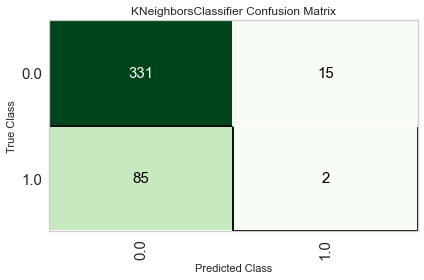

In [145]:
plot_model(clf_model_neutral, plot='confusion_matrix')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

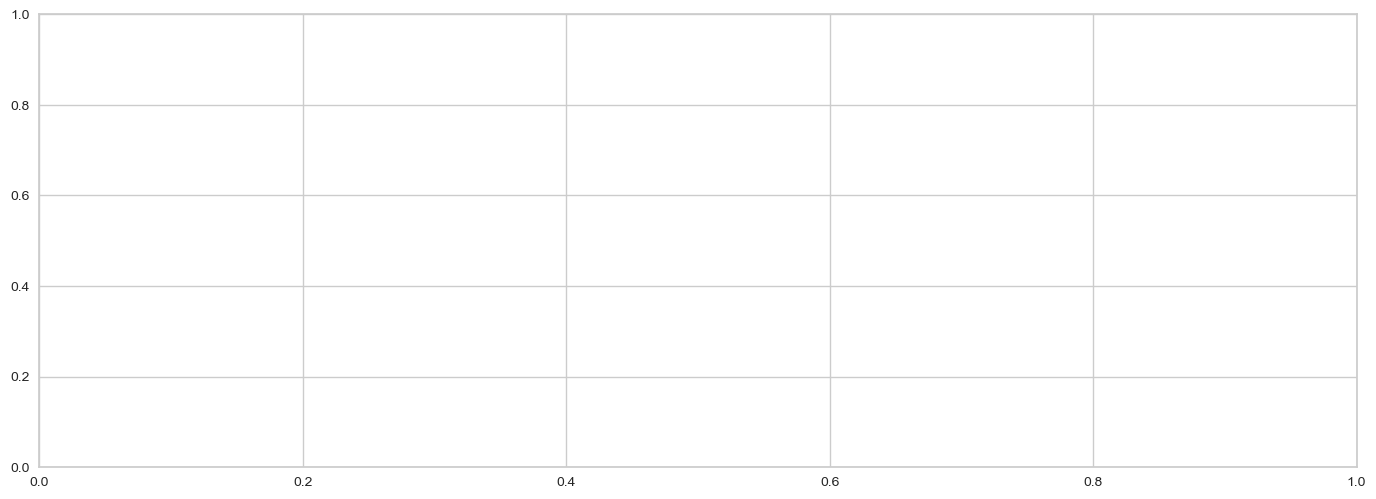

In [146]:
evaluate_model(clf_model_neutral)

In [147]:
## NOW WE ARE CREATING A TRAIN AND TEST SPLIT 

setup(data = df_neutral, target = 'neutral', train_size = 0.7)

,Description,Value
0,Session id,1147
1,Target,neutral
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [148]:
## PREDICTING THE MODEL

predict_holdouts = predict_model(clf_model_neutral)
predict_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7691,0.5121,0.0345,0.1579,0.0566,-0.0166,-0.0230


,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,neutral,prediction_label,prediction_score
401,70.822807,-12.032451,-6.437277,2.721748,8.769314,-5.363994,-8.518057,1.229066,1.860954,3.732413,...,-5.120654,-4.335606,-7.993604,-7.379529,-2.740155,2.094685,4.723603,0.0,0,1.0
549,29.561586,7.375019,10.864430,2.049339,15.781137,0.173910,-1.910506,4.063836,-5.886910,-1.460124,...,-5.927037,-4.248679,-6.846423,-11.085372,-2.753181,2.772656,7.678409,1.0,0,1.0
441,-148.736221,14.708822,-7.614940,8.341169,10.627452,2.276276,6.490907,2.441751,7.145779,-2.061271,...,-5.238431,-2.997941,-9.063381,-10.639982,-3.051706,3.861096,8.043635,0.0,1,0.6
34,186.906342,4.034009,3.700800,-12.941646,-0.886701,0.578445,-2.286205,4.454644,-0.149926,3.181776,...,15.113093,5.926951,-0.345732,11.100440,-2.408880,-8.782192,-11.257545,0.0,0,1.0
29,61.918003,0.661500,3.485308,-14.396264,-6.133965,-0.375661,-1.011433,-1.320776,0.573223,0.175542,...,-4.587360,-3.755170,-8.503051,-9.276042,-1.475910,3.299782,6.800264,0.0,0,1.0


In [149]:
## SAVING THE MODEL 
save_model(clf_model_hypertune_neutral, model_name = "best-model-neutral")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pca_mfcc_1', 'pca_mfcc_2',
                                              'pca_mfcc_3', 'pca_mfcc_4',
                                              'pca_mfcc_5', 'pca_mfcc_6',
                                              'pca_mfcc_7', 'pca_mfcc_8',
                                              'pca_mfcc_9', 'pca_mfcc_10',
                                              'pca_mfcc_11', 'pca_mfcc_12',
                                              'pca_mfcc_13', 'pca_mfcc_14',
                                              'pca_mfcc_15', '...
                                     transformer=LeaveOneOutEncoder(cols=['Audio_name'],
                                                                    drop_invariant=False,
                                                             

In [150]:
loaded_bestmodel_neutral = load_model('best-model-neutral')
print(loaded_bestmodel_neutral)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pca_mfcc_1', 'pca_mfcc_2',
                                             'pca_mfcc_3', 'pca_mfcc_4',
                                             'pca_mfcc_5', 'pca_mfcc_6',
                                             'pca_mfcc_7', 'pca_mfcc_8',
                                             'pca_mfcc_9', 'pca_mfcc_10',
                                             'pca_mfcc_11', 'pca_mfcc_12',
                                             'pca_mfcc_13', 'pca_mfcc_14',
                                             'pca_mfcc_15', '...
                                    transformer=LeaveOneOutEncoder(cols=['Audio_name'],
                                                                   drop_invariant=False,
                    

In [151]:
from sklearn import set_config
set_config(display = "diagram")
loaded_bestmodel_neutral[0]

TransformerWrapper(exclude=None,
                   include=['pca_mfcc_1', 'pca_mfcc_2', 'pca_mfcc_3',
                            'pca_mfcc_4', 'pca_mfcc_5', 'pca_mfcc_6',
                            'pca_mfcc_7', 'pca_mfcc_8', 'pca_mfcc_9',
                            'pca_mfcc_10', 'pca_mfcc_11', 'pca_mfcc_12',
                            'pca_mfcc_13', 'pca_mfcc_14', 'pca_mfcc_15',
                            'pca_mfcc_16', 'pca_mfcc_17', 'pca_mfcc_18',
                            'pca_mfcc_19', 'pca_mfcc_20', 'pca_zcr_1',
                            'pca_zcr_2', 'pca_zcr_3', 'pca_zcr_4', 'pca_zcr_5',
                            'pca_zcr_6', 'pca_zcr_7', 'pca_zcr_8', 'pca_zcr_9',
                            'pca_zcr_10', ...],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             fill_value=None,
                                             missing_values=nan,
                                             strategy='mean', verbose=0))

## MODEL CREATION FOR --> SAD

In [111]:
df_sad = pd.read_csv("labels_oneHot_encoding.csv")

In [112]:
df_sad = df_sad.drop(columns = ["Unnamed: 0" , "angry" , "disgust" , "fear" , "happy" , "neutral" , "gender" , "surprise" , "female_angry" ,"female_disgust" , "female_fear" , "female_happy" , "female_neutral" , "female_sad" , "female_surprise",  "male_angry" ,"male_disgust" , "male_fear" , "male_happy" , "male_neutral" , "male_sad" , "male_surprise" , "path"] , axis = 1)

In [113]:
df_sad.head()

,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_12,pca_mel_13,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,sad
0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,-1.082873,...,-12.453682,-6.254424,-5.244198,-3.020359,-9.067628,-10.647145,-3.032349,3.813296,7.941038,0.0
1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,-2.553631,...,-12.452970,-6.266163,-5.224034,-3.035165,-9.063099,-10.686008,-3.056054,3.814217,7.981975,0.0
2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,-2.645149,...,-12.400792,-6.201859,-4.932682,-3.051120,-9.003797,-10.594508,-2.948012,3.825954,7.939555,0.0
3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,-2.380594,...,-12.388350,-6.240878,-5.088265,-3.072477,-9.064833,-10.652129,-3.076305,3.825014,7.970841,0.0
4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,-1.048890,...,-12.481865,-6.251930,-5.254000,-3.022376,-9.094775,-10.720101,-3.061291,3.846036,8.028451,0.0


In [114]:
df_sad['sad'].value_counts()

0.0    1248
1.0     192
Name: sad, dtype: int64

In [115]:
from pycaret.classification import *
clf_sad = setup(data = df_sad, target = 'sad')

,Description,Value
0,Session id,7916
1,Target,sad
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [116]:
## COMAPRING MODELs

## TRAINING 

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8838,0.8326,0.1549,0.6917,0.2494,0.2212,0.2964,3.7820
ada,Ada Boost Classifier,0.8789,0.7600,0.2736,0.6171,0.3717,0.3160,0.3514,3.7660
gbc,Gradient Boosting Classifier,0.8789,0.8124,0.1549,0.6667,0.2422,0.2080,0.2768,4.2730
xgboost,Extreme Gradient Boosting,0.8769,0.8378,0.1258,0.7017,0.2062,0.1755,0.2537,3.9590
knn,K Neighbors Classifier,0.8759,0.7579,0.1797,0.6886,0.2779,0.2329,0.2989,3.5040
rf,Random Forest Classifier,0.8679,0.7949,0.0077,0.1000,0.0143,0.0127,0.0260,4.1990
et,Extra Trees Classifier,0.8679,0.8238,0.0077,0.1000,0.0143,0.0127,0.0260,3.7320
qda,Quadratic Discriminant Analysis,0.8669,0.5852,0.0000,0.0000,0.0000,0.0000,0.0000,3.5110
dummy,Dummy Classifier,0.8669,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,3.5820
ridge,Ridge Classifier,0.8610,0.0000,0.0824,0.3500,0.1276,0.0893,0.1149,4.5770


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [117]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7916, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [119]:
## NOW WE ARE CREATING THE MODEL 
clf_model_sad = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8713,0.8549,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8713,0.8121,0.1538,0.5000,0.2353,0.1860,0.2251
2,0.9010,0.7727,0.2308,1.0000,0.3750,0.3433,0.4552
3,0.8713,0.8654,0.1429,0.6667,0.2353,0.1960,0.2674
4,0.8812,0.8580,0.2143,0.7500,0.3333,0.2896,0.3593
5,0.9010,0.8596,0.2857,1.0000,0.4444,0.4080,0.5062
6,0.8911,0.9286,0.2143,1.0000,0.3529,0.3197,0.4362
7,0.9000,0.8196,0.2308,1.0000,0.3750,0.3430,0.4549
8,0.8700,0.7126,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [120]:
### HYPER TUNING OF MODELS --> TO GET SOME BETTER ACCURACY 

clf_model_hypertune_sad = tune_model(clf_model_sad)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8812,0.8663,0.0769,1.0000,0.1429,0.1268,0.2602
1,0.8812,0.7517,0.3077,0.5714,0.4000,0.3406,0.3608
2,0.8614,0.7657,0.2308,0.4286,0.3000,0.2307,0.2443
3,0.8515,0.8678,0.1429,0.4000,0.2105,0.1484,0.1726
4,0.8614,0.8087,0.0714,0.5000,0.1250,0.0936,0.1487
5,0.9010,0.8177,0.3571,0.8333,0.5000,0.4546,0.5053
6,0.8911,0.8990,0.2857,0.8000,0.4211,0.3755,0.4368
7,0.8800,0.8046,0.2308,0.6000,0.3333,0.2814,0.3206
8,0.8500,0.7029,0.0000,0.0000,0.0000,-0.0359,-0.0552


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


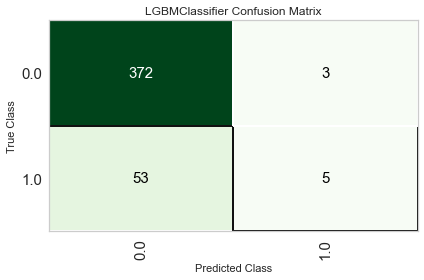

In [121]:
plot_model(clf_model_sad, plot='confusion_matrix')

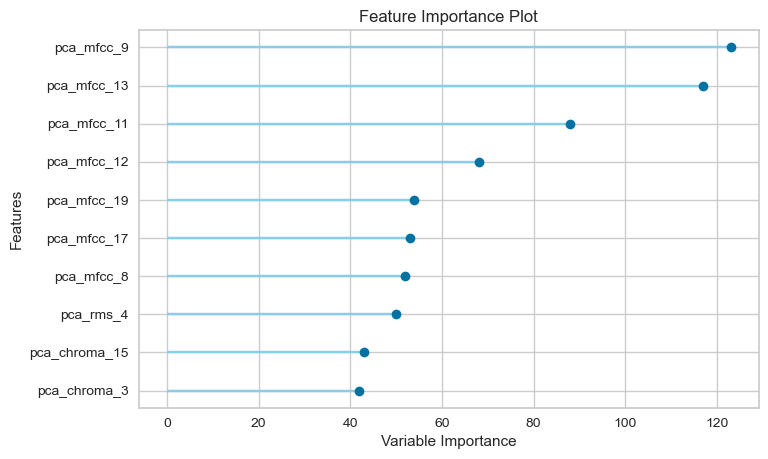

In [122]:
plot_model(clf_model_sad, plot = 'feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

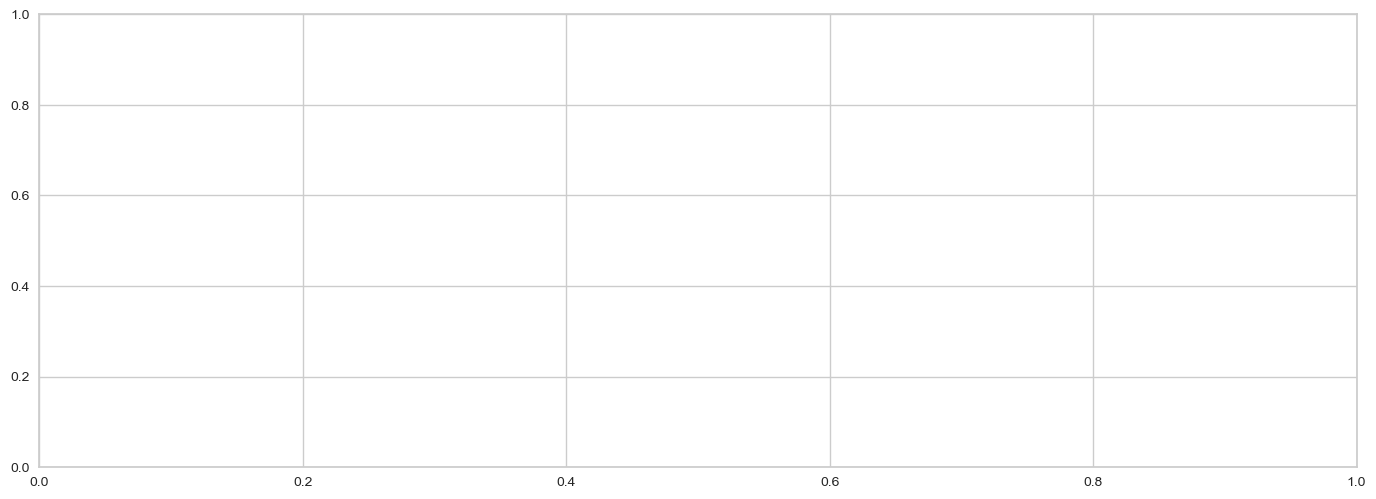

In [123]:
evaluate_model(clf_model_sad)

In [128]:
## NOW WE ARE CREATING A TRAIN AND TEST SPLIT 

setup(data = df_sad, target = 'sad', train_size = 0.7)

,Description,Value
0,Session id,4953
1,Target,sad
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [129]:
## TESTING THE MODEL 

clf_predict = predict_model(clf_model_hypertune_sad)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9700,0.9887,0.7759,1.0000,0.8738,0.8571,0.8659


In [130]:
## PREDICTING THE MODEL

predict_holdouts = predict_model(clf_model_sad)
predict_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9700,0.9887,0.7759,1.0000,0.8738,0.8571,0.8659


,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,sad,prediction_label,prediction_score
478,14.191238,-1.155912,-14.007283,5.677155,8.397635,-5.969778,3.531418,3.562046,7.477235,-7.065995,...,-4.829867,-3.133977,-8.278189,-9.012877,-2.283520,3.264062,6.667505,0.0,0,0.9998
1257,79.019020,10.512461,12.745047,-6.178816,-4.285565,0.013791,-6.917908,-3.592750,2.022225,-1.074823,...,-3.477344,-0.751157,-2.744921,-3.319169,-5.357198,1.319908,7.757660,0.0,0,1.0000
1290,14.290275,-10.386034,5.155444,-4.788595,1.723554,1.681546,-6.536436,2.454835,1.153769,0.985666,...,-4.768933,-1.956210,-8.314413,-9.106192,-2.595358,2.418798,6.918724,0.0,0,0.9997
1193,6.325849,-17.948559,0.646191,2.596896,-3.178971,-8.289131,1.868154,0.032811,6.158566,-0.581544,...,-4.863818,-2.951602,-8.807776,-9.995614,-2.599325,3.783306,7.409889,0.0,0,0.9999
614,-76.597351,14.627516,-16.735579,-7.770101,-3.323005,0.679569,-2.219943,0.933722,-3.283334,3.362409,...,-4.989542,-3.043766,-9.003999,-10.573056,-3.080677,3.832797,7.934435,0.0,0,0.9913


In [131]:
## SAVING THE MODEL 
save_model(clf_model_hypertune_sad, model_name = "best-model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pca_mfcc_1', 'pca_mfcc_2',
                                              'pca_mfcc_3', 'pca_mfcc_4',
                                              'pca_mfcc_5', 'pca_mfcc_6',
                                              'pca_mfcc_7', 'pca_mfcc_8',
                                              'pca_mfcc_9', 'pca_mfcc_10',
                                              'pca_mfcc_11', 'pca_mfcc_12',
                                              'pca_mfcc_13', 'pca_mfcc_14',
                                              'pca_mfcc_15', '...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                    

In [132]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pca_mfcc_1', 'pca_mfcc_2',
                                             'pca_mfcc_3', 'pca_mfcc_4',
                                             'pca_mfcc_5', 'pca_mfcc_6',
                                             'pca_mfcc_7', 'pca_mfcc_8',
                                             'pca_mfcc_9', 'pca_mfcc_10',
                                             'pca_mfcc_11', 'pca_mfcc_12',
                                             'pca_mfcc_13', 'pca_mfcc_14',
                                             'pca_mfcc_15', '...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate

## MODEL FOR SURPRISE

In [152]:
df_surprise = pd.read_csv("labels_oneHot_encoding.csv")

In [153]:
df_surprise.head()

,Unnamed: 0,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,...,female_neutral,female_sad,female_surprise,male_angry,male_disgust,male_fear,male_happy,male_neutral,male_sad,male_surprise
0,0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,...,0,0,0,0,0,0,0,1,0,0
1,1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,...,0,0,0,0,0,0,0,1,0,0
2,2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,...,0,0,0,0,0,0,0,1,0,0
3,3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,...,0,0,0,0,0,0,0,1,0,0
4,4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,...,0,0,0,0,0,0,0,1,0,0


In [154]:
df_surprise = df_surprise.drop(columns = ["Unnamed: 0" , "angry" , "disgust" , "fear" , "happy" , "neutral" , "sad" , "gender" , "female_angry" ,"female_disgust" , "female_fear" , "female_happy" , "female_neutral" , "female_sad" , "female_surprise",  "male_angry" ,"male_disgust" , "male_fear" , "male_happy" , "male_neutral" , "male_sad" , "male_surprise" , "path"] , axis = 1)

In [155]:
df_surprise.head()

,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_12,pca_mel_13,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,surprise
0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,-1.082873,...,-12.453682,-6.254424,-5.244198,-3.020359,-9.067628,-10.647145,-3.032349,3.813296,7.941038,0.0
1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,-2.553631,...,-12.452970,-6.266163,-5.224034,-3.035165,-9.063099,-10.686008,-3.056054,3.814217,7.981975,0.0
2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,-2.645149,...,-12.400792,-6.201859,-4.932682,-3.051120,-9.003797,-10.594508,-2.948012,3.825954,7.939555,0.0
3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,-2.380594,...,-12.388350,-6.240878,-5.088265,-3.072477,-9.064833,-10.652129,-3.076305,3.825014,7.970841,0.0
4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,-1.048890,...,-12.481865,-6.251930,-5.254000,-3.022376,-9.094775,-10.720101,-3.061291,3.846036,8.028451,0.0


In [157]:
df_surprise['surprise'].value_counts()

0.0    1248
1.0     192
Name: surprise, dtype: int64

In [158]:
from pycaret.classification import *
clf = setup(data = df_surprise, target = 'surprise')

,Description,Value
0,Session id,1799
1,Target,surprise
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [159]:
## COMAPRING MODELs

## TRAINING 

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8897,0.8701,0.2615,0.7733,0.3773,0.3345,0.3968,6.6060
xgboost,Extreme Gradient Boosting,0.8828,0.8697,0.2302,0.6793,0.3367,0.2908,0.3446,6.5480
gbc,Gradient Boosting Classifier,0.8739,0.8411,0.1577,0.5064,0.2327,0.1943,0.2346,8.0530
ridge,Ridge Classifier,0.8729,0.0000,0.1187,0.6167,0.1954,0.1603,0.2260,6.3970
rf,Random Forest Classifier,0.8689,0.8345,0.0154,0.1000,0.0267,0.0241,0.0370,6.4380
et,Extra Trees Classifier,0.8689,0.8582,0.0154,0.1000,0.0267,0.0241,0.0370,5.1520
qda,Quadratic Discriminant Analysis,0.8669,0.5892,0.0000,0.0000,0.0000,0.0000,0.0000,6.9550
dummy,Dummy Classifier,0.8669,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,4.5660
knn,K Neighbors Classifier,0.8630,0.7650,0.2819,0.4901,0.3511,0.2810,0.2976,5.4420
ada,Ada Boost Classifier,0.8600,0.7918,0.3214,0.4668,0.3773,0.3019,0.3103,7.2030


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [160]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1799, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [161]:
## NOW WE ARE CREATING THE MODEL 
clf_model_surprise = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8812,0.8489,0.2143,0.7500,0.3333,0.2896,0.3593
1,0.8614,0.8990,0.2143,0.5000,0.3000,0.2365,0.2628
2,0.9010,0.8883,0.2857,1.0000,0.4444,0.4080,0.5062
3,0.8911,0.8399,0.2857,0.8000,0.4211,0.3755,0.4368
4,0.9208,0.8392,0.3846,1.0000,0.5556,0.5213,0.5938
5,0.8911,0.8776,0.3077,0.6667,0.4211,0.3698,0.4037
6,0.9109,0.9502,0.4615,0.7500,0.5714,0.5248,0.5441
7,0.8800,0.8258,0.2308,0.6000,0.3333,0.2814,0.3206
8,0.8800,0.8798,0.0769,1.0000,0.1429,0.1266,0.2600


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [162]:
### HYPER TUNING OF MODELS --> TO GET SOME BETTER ACCURACY 

clf_model_hypertune_surprise = tune_model(clf_model_surprise)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8812,0.8547,0.1429,1.0000,0.2500,0.2231,0.3543
1,0.8713,0.8662,0.1429,0.6667,0.2353,0.1960,0.2674
2,0.8515,0.8842,0.0000,0.0000,0.0000,-0.0188,-0.0401
3,0.8713,0.7816,0.2143,0.6000,0.3158,0.2619,0.3047
4,0.8713,0.8593,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8614,0.8470,0.1538,0.4000,0.2222,0.1623,0.1849
6,0.8911,0.9388,0.2308,0.7500,0.3529,0.3112,0.3767
7,0.8800,0.7666,0.2308,0.6000,0.3333,0.2814,0.3206
8,0.8900,0.8090,0.1538,1.0000,0.2667,0.2403,0.3696


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


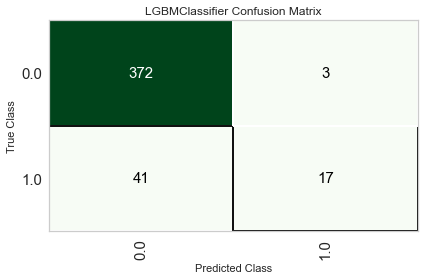

In [163]:
plot_model(clf_model_surprise, plot='confusion_matrix')

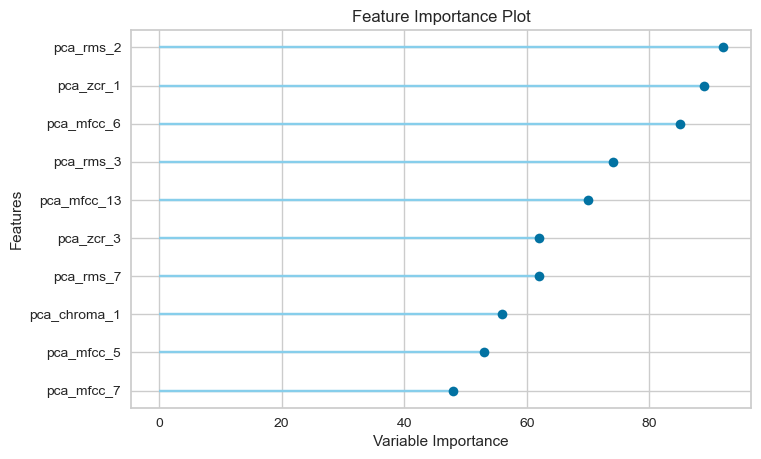

In [164]:
plot_model(clf_model_surprise, plot = 'feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

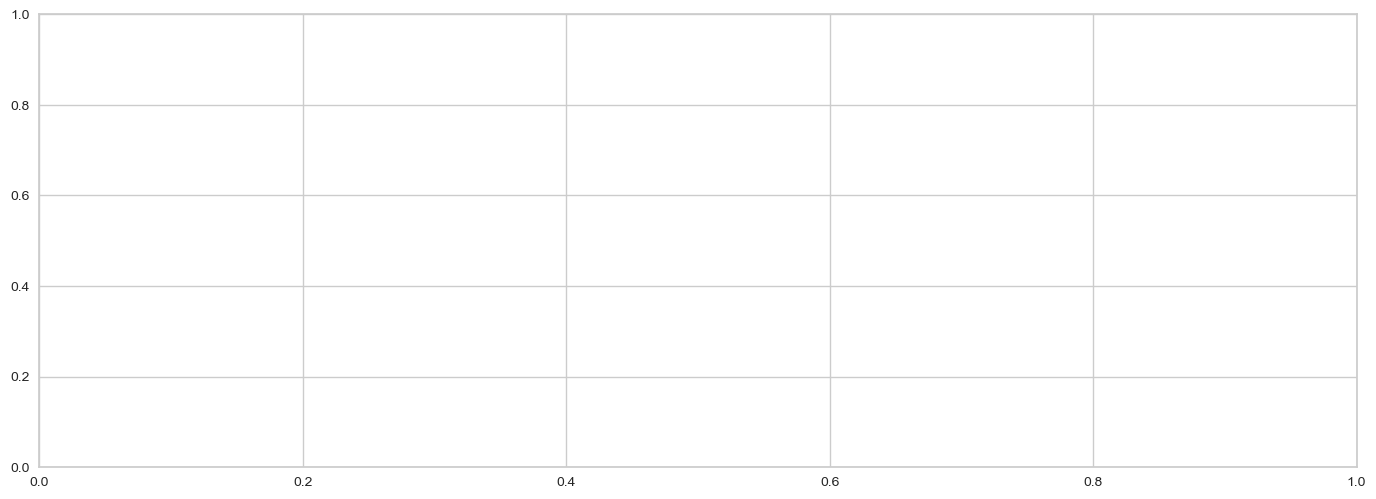

In [165]:
evaluate_model(clf_model_surprise)

In [166]:
## NOW WE ARE CREATING A TRAIN AND TEST SPLIT 

setup(data = df_surprise, target = 'surprise', train_size = 0.7)

,Description,Value
0,Session id,7074
1,Target,surprise
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [167]:
## TESTING THE MODEL 

clf_predict = predict_model(clf_model_hypertune_surprise)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9700,0.9913,0.7931,0.9787,0.8762,0.8593,0.8655


In [168]:
## PREDICTING THE MODEL

predict_holdouts = predict_model(clf_model_surprise)
predict_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9700,0.9913,0.7931,0.9787,0.8762,0.8593,0.8655


,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,surprise,prediction_label,prediction_score
220,174.031693,-10.497867,-23.702795,1.239112,-8.826835,11.445755,5.129862,5.024201,-7.330833,4.590028,...,15.761311,-18.251492,-0.951039,-2.927299,16.150764,2.083087,1.526670,0.0,0,0.9998
277,-69.180313,0.992069,-7.599677,-1.126029,-0.788570,3.951962,0.322501,-3.363123,1.236166,1.196571,...,-5.043020,-2.978834,-9.028132,-10.537951,-3.079061,3.763079,7.899757,0.0,0,0.9983
232,-17.864935,-21.856651,1.358302,-0.364237,-3.518660,-6.543304,0.603322,1.751672,5.310733,-3.470369,...,-4.864807,-2.801304,-8.159702,-9.217417,-2.878062,4.086605,7.894667,1.0,1,0.9959
1371,2.730233,1.068341,0.239074,-15.955541,-7.325517,4.703403,-1.738818,2.950960,2.417435,-0.662192,...,-4.761126,-2.497052,-8.337362,-9.571126,-3.167271,3.520051,7.386960,0.0,0,0.9998
289,-0.272021,3.882373,-4.069470,-4.235767,0.130879,1.364720,6.632018,-6.969396,-1.731304,-0.337202,...,-5.053366,-3.199120,-8.803140,-10.026302,-3.155725,3.500392,7.783640,0.0,0,0.9996


In [169]:
## SAVING THE MODEL 
save_model(clf_model_hypertune_surprise, model_name = "best-model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pca_mfcc_1', 'pca_mfcc_2',
                                              'pca_mfcc_3', 'pca_mfcc_4',
                                              'pca_mfcc_5', 'pca_mfcc_6',
                                              'pca_mfcc_7', 'pca_mfcc_8',
                                              'pca_mfcc_9', 'pca_mfcc_10',
                                              'pca_mfcc_11', 'pca_mfcc_12',
                                              'pca_mfcc_13', 'pca_mfcc_14',
                                              'pca_mfcc_15', '...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                    

In [170]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pca_mfcc_1', 'pca_mfcc_2',
                                             'pca_mfcc_3', 'pca_mfcc_4',
                                             'pca_mfcc_5', 'pca_mfcc_6',
                                             'pca_mfcc_7', 'pca_mfcc_8',
                                             'pca_mfcc_9', 'pca_mfcc_10',
                                             'pca_mfcc_11', 'pca_mfcc_12',
                                             'pca_mfcc_13', 'pca_mfcc_14',
                                             'pca_mfcc_15', '...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate

In [171]:
from sklearn import set_config
set_config(display = "diagram")
loaded_bestmodel[0]

TransformerWrapper(exclude=None,
                   include=['pca_mfcc_1', 'pca_mfcc_2', 'pca_mfcc_3',
                            'pca_mfcc_4', 'pca_mfcc_5', 'pca_mfcc_6',
                            'pca_mfcc_7', 'pca_mfcc_8', 'pca_mfcc_9',
                            'pca_mfcc_10', 'pca_mfcc_11', 'pca_mfcc_12',
                            'pca_mfcc_13', 'pca_mfcc_14', 'pca_mfcc_15',
                            'pca_mfcc_16', 'pca_mfcc_17', 'pca_mfcc_18',
                            'pca_mfcc_19', 'pca_mfcc_20', 'pca_zcr_1',
                            'pca_zcr_2', 'pca_zcr_3', 'pca_zcr_4', 'pca_zcr_5',
                            'pca_zcr_6', 'pca_zcr_7', 'pca_zcr_8', 'pca_zcr_9',
                            'pca_zcr_10', ...],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             fill_value=None,
                                             missing_values=nan,
                                             strategy='mean', verbose=0))